### 1.1 Pandas

In [1]:
import pandas as pd

In [3]:

bookings = pd.read_csv('bookings.csv',sep = ';')
bookings_head = bookings.head(7)

Посмотрите на размеры таблицы. Сколько всего в ней столбцов?

In [4]:
bookings_head.shape

(7, 21)

К какому типу относится большинство переменных? 

In [5]:
bookings_head.dtypes.value_counts()

object     10
int64      10
float64     1
dtype: int64

Исправьте ситуацию: приведите названия столбцов к нижнему регистру и замените пробелы на знак нижнего подчёркивания

In [6]:
name = list(bookings_head.columns.unique())


In [7]:
def repl(name):
    new_name = []
    for i in name:
        a = i.strip().lower().replace(' ', '_')
        new_name.append(a)
    return new_name

In [8]:
new_name = repl(name)

In [9]:
bookings.rename(columns=dict(zip(name,new_name)), inplace=True)


In [10]:
bookings.head()

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


Пользователи из каких стран совершили наибольшее число успешных бронирований? 
Бронирование считается успешным, если в дальнейшем оно не было отменено (переменная is_canceled). В качестве ответа выберите страны, входящие в топ-5.

In [11]:
bookings.query("is_canceled != 1").groupby("country")\
.agg({'is_canceled':'count'}).sort_values('is_canceled',ascending=False).head()

,is_canceled
country,
PRT,21071
GBR,9676
FRA,8481
ESP,6391
DEU,6069


На сколько ночей (stays_total_nights)  в среднем бронируют отели типа City Hotel? Resort Hotel? Запишите полученные значения в пропуски с точностью до 2 знаков после точки.

In [12]:
gr_hotel = bookings.groupby('hotel').agg({'stays_total_nights':'mean'})
gr_hotel["mean_total_nights"] = round(gr_hotel.stays_total_nights,2)
gr_hotel.head()

,stays_total_nights,mean_total_nights
hotel,,
City Hotel,2.978142,2.98
Resort Hotel,4.318547,4.32


Иногда тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type). Такое может произойти, например, по причине овербукинга.

Сколько подобных наблюдений встретилось в датасете?

In [13]:
bookings.query("assigned_room_type != reserved_room_type").shape[0]

14917

In [14]:
bookings['new'] = 1

Теперь проанализируйте даты запланированного прибытия (arrival_date_year).

На какой месяц чаще всего оформляли бронь в 2016 году? Изменился ли самый популярный месяц в 2017 году?

In [15]:
bookings.query("arrival_date_year == 2016").groupby( "arrival_date_month").agg({'new':'sum'})

,new
arrival_date_month,
April,5428
August,5063
December,3860
February,3891
January,2248
July,4572
June,5292
March,4824
May,5478


 Сгруппируйте данные по годам, а затем проверьте, на какой месяц (arrival_date_month) бронирования отеля типа City Hotel отменялись чаще всего в 2015? 2016? 2017? 

Hint: для этого сначала примените метод groupby, после чего выберите нужную колонку для дальнейших действий :) Например:

df.groupby('column_1')['column_2'].what_to_do()

In [16]:
bookings

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date,new
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,...,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01,1
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,...,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01,1
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,...,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,...,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,...,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,2017,August,35,30,2,5,...,0.0,0,BB,BEL,A,A,Transient,Check-Out,2017-09-06,1
119386,City Hotel,0,102,2017-08-31,2017,August,35,31,2,5,...,0.0,0,BB,FRA,E,E,Transient,Check-Out,2017-09-07,1
119387,City Hotel,0,34,2017-08-31,2017,August,35,31,2,5,...,0.0,0,BB,DEU,D,D,Transient,Check-Out,2017-09-07,1
119388,City Hotel,0,109,2017-08-31,2017,August,35,31,2,5,...,0.0,0,BB,GBR,A,A,Transient,Check-Out,2017-09-07,1


In [17]:
bookings[(bookings.hotel == "City Hotel")].query('is_canceled == 1').groupby(['arrival_date_year','arrival_date_month']).agg({"new":"sum"})



new
arrival_date_year arrival_date_month      
2015              August              1232
                  December             668
                  July                 939
                  November             301
                  October             1321
                  September           1543
2016              April               1539
                  August              1247
                  December            1072
                  February             930
                  January              438
                  July                1043
                  June                1720
                  March               1108
                  May                 1436
                  November            1360
                  October             1947
                  September           1567
2017              April               1926
                  August              1123
                  February             971
                  January             1044
                  July                1324
                  June                1808
                  March               1278
                  May                 2217

Посмотрите на числовые характеристики трёх колонок: adults, children и babies. Какая из них имеет наибольшее среднее значение?

In [18]:

bookings.agg({'adults': [ 'mean'],
        'children' : ['mean'],
            'babies':['mean'] })

,adults,children,babies
mean,1.856403,0.10389,0.007949


In [19]:
#на тот сл., если столбцов много 
bookings.filter(like = 'arrival')

,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month
0,2015-07-01,2015,July,27,1
1,2015-07-01,2015,July,27,1
2,2015-07-01,2015,July,27,1
3,2015-07-01,2015,July,27,1
4,2015-07-01,2015,July,27,1
...,...,...,...,...,...
119385,2017-08-30,2017,August,35,30
119386,2017-08-31,2017,August,35,31
119387,2017-08-31,2017,August,35,31
119388,2017-08-31,2017,August,35,31


А теперь получите серию с числом уникальных значений

In [20]:
bookings.nunique() 

hotel                          2
is_canceled                    2
lead_time                    479
arrival_full_date            793
arrival_date_year              3
arrival_date_month            12
arrival_date_week_number      53
arrival_date_day_of_month     31
stays_in_weekend_nights       17
stays_in_week_nights          35
stays_total_nights            45
adults                        14
children                       5
babies                         5
meal                           5
country                      177
reserved_room_type            10
assigned_room_type            12
customer_type                  4
reservation_status             3
reservation_status_date      926
new                            1
dtype: int64

Соединить 2 датафрейма по колонке client_id

In [21]:
#full_data = df.merge(data, on=['client_id'], how='inner')

А теперь создадим свою собственную функцию! Напишите функцию read_n_agg, которая:

принимает на вход один параметр – путь к файлу

считывает переданный файл, в котором разделителем является ;

считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)

возвращает результат этих действий (агрегированный датафрэйм)

In [22]:
def read_n_agg(path):
    import pandas as pd
    df = pd.read_csv(path,sep = ';')
    agg_df = df.groupby('company',as_index =True).agg({"income":"mean"})
    return agg_df

In [23]:
taxi = pd.read_csv("https://stepik.org/media/attachments/lesson/359240/taxi_peru.csv",sep = ';',parse_dates = ['start_at','end_at','arrived_at'])

In [24]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [25]:
taxi.groupby('source',as_index = True).agg({'user_id':'count'}).rename(columns={"user_id":'count'}).sort_values('count',ascending = False)

,count
source,
iPhone,9741
web,7631
Android,4909
iPad,571
Wap,136


In [28]:
9741/22988


0.42374282234209154

In [29]:
user=pd.read_csv("https://stepik.org/media/attachments/lesson/360348/user_data.csv")

In [30]:
user.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [31]:
logi = pd.read_csv("https://stepik.org/media/attachments/lesson/360348/logs.csv")

In [32]:
logi.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [33]:
logi.nunique()

client      4011
success        2
platform       3
time        4376
dtype: int64

In [34]:
logi[logi.success == True].groupby('client',as_index = False).agg({'time':'count'}).rename(columns = {"time":"number"}).sort_values("number",ascending = False).query("number == 41")

,client,number
332,12179,41
1758,61468,41
1487,52870,41
1759,61473,41
2626,92584,41
2345,82563,41
2231,78349,41
1020,36165,41
810,28719,41


332,1758,1487,1759,2626,2345,2231,1020,810 - данные клиенты совершили больше всего успешных операций

Какую платформу предпочитают премиальные клиенты?

In [35]:
full_user = user.merge(logi, on=['client'], how='inner')

In [36]:
full_user.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [37]:
full_user[full_user.premium == True].groupby('platform',as_index = False).agg({"time":"count"})

,platform,time
0,computer,150
1,phone,246
2,tablet,24


### Дополнительная информация

In [38]:
# комбинирование условий 
#df[(df['Sex'] == 'male')|(df['Job'] == '2')] & - 'и' 

In [39]:
#нахождение в тексе кого-либо символа
#df[df['Purpose'].str.contains('radio')] 

In [40]:
# вывод записей по макс и мин 
#df.nlargest(5,'Credit amount') # для макс
#df.nsmallest(5,'Credit amount') # для мин 

In [41]:
#level_map = {1: ‘high’, 2: ‘medium’, 3: ‘low’}
#df[‘c_level’] = df[‘c’].map(level_map)

In [42]:
#df[df['Purpose'].isin(['car','education'])] # метод для нескольких условий

### 1.2 Работе с грязными данными 

Пример 1:
    
Поставлена задача посчитать сумму по конкретному столбцу, но значения в этом столбце имеют тип "object"(в нашем случае: могут быть значения такого вида:$100.00) и не поддаются агрегации.

Для решения данной проблему воспользуемся следующим кодом:

df['Sales'] = df['Sales'].apply(lambda x: x.replace('$', '').replace(',', '')
                                if isinstance(x, str) else x).astype(float)



Для распознавания каких-либо символов можно изначально при загрузки для чтения поставить нужный параметр в read_csv:
    
missing_values = ["n/a", "na", "--"]

df = pd.read_csv("property data.csv", na_values = missing_values)

In [ ]:
# df.loc[2,'ST_NUM'] = 125 - возможность сделать замену только в обной ячейке 


In [ ]:
#Часто заменять пропуске в столбце количесвенной переменной следует на меры центральной тенденции: мода, среднее, медиана:
        
#median = df['NUM_BEDROOMS'].median()
#df['NUM_BEDROOMS'].fillna(median, inplace=True)

# Руководство по очистке данных в Python

In [44]:
#Прежде чем передать набор данных ML-модели, его нужно очистить: обработать пропуски, дубликаты, выбросы.

In [45]:
#пропуски:
#cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
#colours = ['#000099', '#ffff00'] 
#sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours)) - тепловая карта пропуском

Отличным дополнением к тепловой карте - процентный список пропущенных значений

for col in df.columns:

    pct_missing = np.mean(df[col].isnull())
    
    print('{} - {}%'.format(col, round(pct_missing*100)))

Разберем четыре самых распространенных техники борьбы с грязью:

1)Отбрасываение строк

2)Отбрасывание столбцов

3)Внесение недостающих значений

4)Удаление дубликатов

df_dedupped = df.drop('id', axis=1).drop_duplicates()

print(df.shape)

print(df_dedupped.shape)

5)Удаление неинф. признаков


### Еще немного о сводных таблицах

pd.pivot_table для количесвенных переменных (интересный параметр - margins = True - подводит итоги)

pd.crosstab позволят смотреть отношение котегориальных переменных (интересный параметр - normalize = 'all','index','columns')

pd.pivot_table(df,
               index=["Manager", "Rep"],
               values=["Price"],
               columns=["Product"],
               aggfunc=[np.sum])

## Визуализация matplotlib

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
# отображение графиков в jupyter notebook
%config InlineBackend.figure_format = 'svg'
#благодаря этой строчке все графики будут выводиться в векторном формате svg:

In [47]:

import numpy as np
x = np.linspace(0, 5, 11)
y = x**2


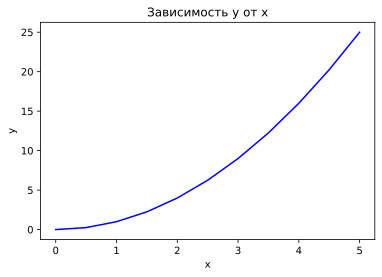

In [48]:
# базовые команды matplotlib
plt.plot(x,y,'b')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Зависимость у от х')
plt.show()

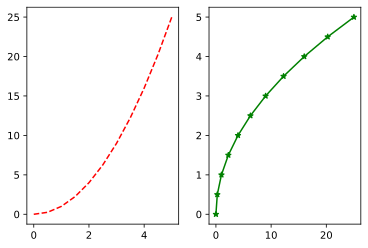

In [49]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')  #  Магия
plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*-');

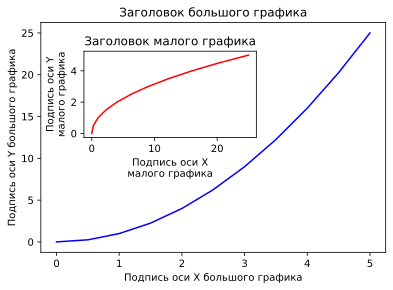

In [50]:
# Создадим пустое полотно
fig = plt.figure()

# Оси задаются через список из 4-х чисел: координаты левого нижнего угла, ширина и высота.
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])

axes1.plot(x, y, 'b')
axes1.set_xlabel('Подпись оси X большого графика')
axes1.set_ylabel('Подпись оси Y большого графика')
axes1.set_title('Заголовок большого графика')

axes2.plot(y, x, 'r')
axes2.set_xlabel('Подпись оси X\nмалого графика')
axes2.set_ylabel('Подпись оси Y\nмалого графика')
axes2.set_title('Заголовок малого графика');

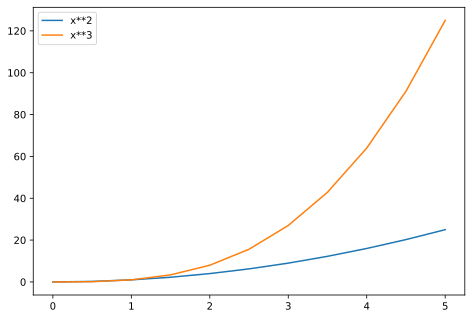

In [51]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")

ax.legend();

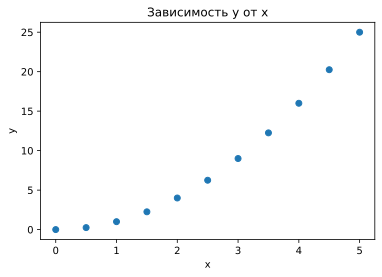

In [52]:
#другие виды графиков
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Зависимость у от х')
plt.show()

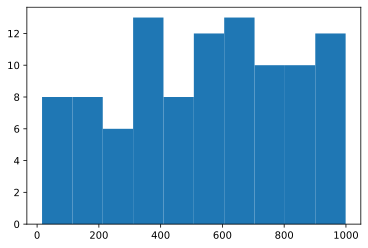

In [53]:
#гистограмма
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data);

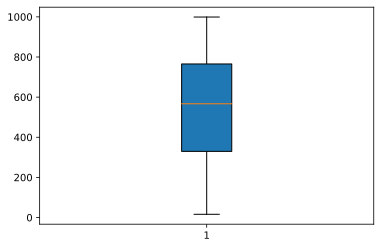

In [54]:
plt.boxplot(data,vert=True,patch_artist=True);

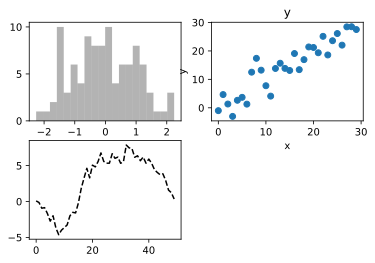

In [55]:
#замечание:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')
ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

ax2.set_title('y')
ax2.scatter(np.arange(30), np.arange(30)+3*randn(30))

# seaborn

In [61]:
import seaborn as sns

In [62]:
flights_data = sns.load_dataset("flights")
flights_data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:xlabel='year', ylabel='passengers'>

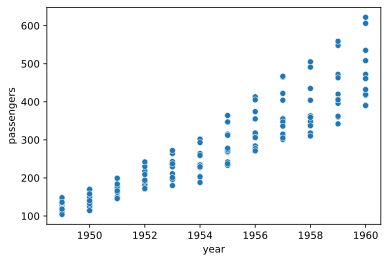

In [63]:
#диаграмма рассеивания
sns.scatterplot(data=flights_data, x="year", y="passengers")


<AxesSubplot:xlabel='year', ylabel='passengers'>

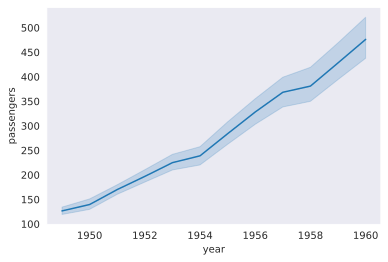

In [64]:
#линейный график 
sns.set_style("dark")
sns.lineplot(data=flights_data, x="year", y="passengers")

<AxesSubplot:xlabel='year', ylabel='passengers'>

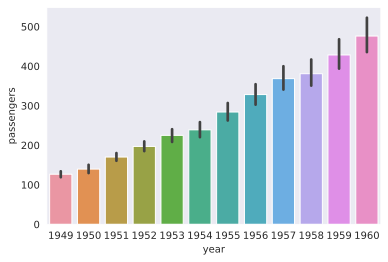

In [65]:
# cтолбцатая диаграмма
sns.barplot(data=flights_data, x="year", y="passengers")

In [66]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [67]:
tips_df["tip_percentage"] = tips_df["tip"] / tips_df["total_bill"]
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


<AxesSubplot:xlabel='tip_percentage', ylabel='Count'>

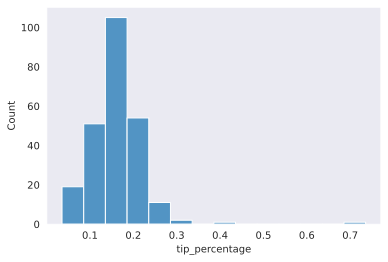

In [68]:
sns.histplot(tips_df["tip_percentage"], binwidth=0.05)

<AxesSubplot:xlabel='tip_percentage', ylabel='Count'>

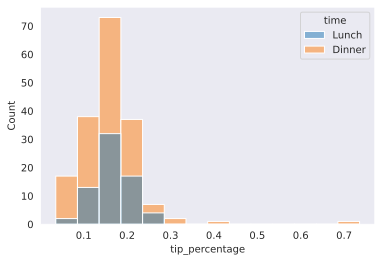

In [69]:
sns.histplot(data=tips_df, x="tip_percentage", binwidth=0.05, hue="time")

<AxesSubplot:xlabel='day', ylabel='tip'>

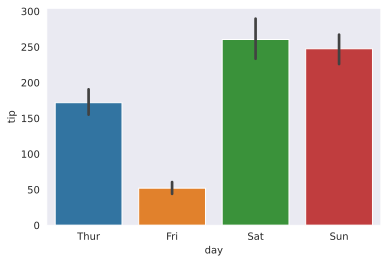

In [70]:
import numpy as np
sns.barplot(data=tips_df, x="day", y="tip", estimator=np.sum)

<AxesSubplot:xlabel='day', ylabel='tip'>

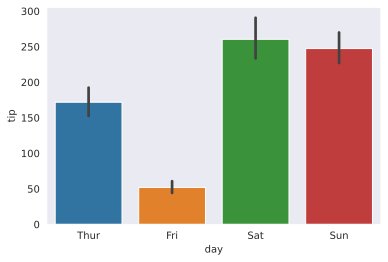

In [71]:
sns.barplot(data=tips_df, x="day", y="tip", estimator=np.sum)